# Loading dataset

In [1]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

# Считываем базу знаний
knowledge_base = pd.read_excel('/kaggle/input/faq-vseros/01__.xlsx')
knowledge_base.rename(columns={'Вопрос из БЗ': 'question', 'Ответ из БЗ': 'answer'}, inplace=True)

# Считываем реальные кейсы использования
real_cases = pd.read_excel('/kaggle/input/faq-vseros/02__.xlsx')
real_cases.rename(columns={'Вопрос пользователя': 'question', 'Ответ сотрудника': 'answer'}, inplace=True)

# Считываем эталонные вопросы-ответы из реальных кейсов
neighbors_best_faq = real_cases[['Вопрос из БЗ', 'Ответ из БЗ', 'Классификатор 1 уровня', 'Классификатор 2 уровня']]
neighbors_best_faq.rename(columns={'Вопрос из БЗ': 'question', 'Ответ из БЗ': 'answer'}, inplace=True)

negative_examples = pd.read_excel('/kaggle/input/faq-vseros/modified_questions_answers.xlsx')
negative_examples = negative_examples.assign(target1='ОТСУТСТВУЕТ', target2='Отсутствует')
negative_examples.rename(columns={'target1': 'Классификатор 1 уровня', 'target2': 'Классификатор 2 уровня'}, inplace=True)

data = pd.concat([
    knowledge_base[['question', 'answer', 'Классификатор 1 уровня', 'Классификатор 2 уровня']],
    real_cases[['question', 'answer', 'Классификатор 1 уровня', 'Классификатор 2 уровня']],
    neighbors_best_faq[['question', 'answer', 'Классификатор 1 уровня', 'Классификатор 2 уровня']],
    negative_examples[['question', 'answer', 'Классификатор 1 уровня', 'Классификатор 2 уровня']]
])

data = data.drop_duplicates(subset=data.columns)
print(len(data))
data.head(10)

1201


,question,answer,Классификатор 1 уровня,Классификатор 2 уровня
0,Что нельзя публиковать на RUTUBE?,Чужой контент без разрешения автора или правоо...,МОДЕРАЦИЯ,Отклонение/блокировка видео
1,Почему могут отключить монетизацию из-за автор...,"Монетизация может отключиться, если на вашем к...",МОНЕТИЗАЦИЯ,Отключение/подключение монетизации
2,Почему могут отключить монетизацию из-за искус...,Монетизация на RUTUBE зависит в том числе от к...,МОНЕТИЗАЦИЯ,Отключение/подключение монетизации
3,"Для каких статусов доступна монетизация, и поч...","Монетизацию на RUTUBE можно подключить, если в...",МОНЕТИЗАЦИЯ,Отключение/подключение монетизации
4,Какой контент можно использовать для монетизац...,"То, что вы создали сами: видео, которое вы сня...",МОНЕТИЗАЦИЯ,Отключение/подключение монетизации
5,Какие материалы защищены авторским правом?,Авторским правом охраняются произведения искус...,МОДЕРАЦИЯ,Отклонение/блокировка видео
6,Как подтвердить права на использование контент...,Если на вашем канале есть потенциально чужой к...,МОНЕТИЗАЦИЯ,Отключение/подключение монетизации
7,"Кому принадлежат авторские права на контент, к...","По умолчанию считается, что авторские права на...",МОДЕРАЦИЯ,Отклонение/блокировка видео
8,Можно ли цитировать чужие произведения?,"Да, но нужно соблюдать несколько условий: Цити...",МОДЕРАЦИЯ,Отклонение/блокировка видео
9,Могу ли я использовать небольшие фрагменты фил...,"Да, на тех же условиях, что и цитирование. Исп...",МОДЕРАЦИЯ,Отклонение/блокировка видео


## Разобьем выборку на train/val

In [2]:
unique_pairs = data[['Классификатор 1 уровня', 'Классификатор 2 уровня']].drop_duplicates()
unique_pairs

,Классификатор 1 уровня,Классификатор 2 уровня
0,МОДЕРАЦИЯ,Отклонение/блокировка видео
1,МОНЕТИЗАЦИЯ,Отключение/подключение монетизации
15,МОДЕРАЦИЯ,Нарушение авторских прав
16,УПРАВЛЕНИЕ АККАУНТОМ,Персонализация
18,ДОСТУП К RUTUBE,Приложение
19,ОТСУТСТВУЕТ,Отсутствует
20,УПРАВЛЕНИЕ АККАУНТОМ,Регистрация/Авторизация
27,УПРАВЛЕНИЕ АККАУНТОМ,Удаление аккаунта
29,ПРЕДЛОЖЕНИЯ,Студия RUTUBE
32,ПРЕДЛОЖЕНИЯ,Навигация


In [4]:
# Создание простых переходов от айдишника к лэйблу и обратно

# Получение по паре классификаторов классификатор 1го уровня
label21label = {f"{row[1]['Классификатор 1 уровня']} {row[1]['Классификатор 2 уровня']}": row[1]['Классификатор 1 уровня'] for row in unique_pairs.iterrows()} 

# Получение по паре классификаторов классификатор 2го уровня
label22label = {f"{row[1]['Классификатор 1 уровня']} {row[1]['Классификатор 2 уровня']}": row[1]['Классификатор 2 уровня'] for row in unique_pairs.iterrows()} 

label2id = {f"{row[1]['Классификатор 1 уровня']} {row[1]['Классификатор 2 уровня']}": i for i, row in enumerate(unique_pairs.iterrows())}
id2label = {i: f"{row[1]['Классификатор 1 уровня']} {row[1]['Классификатор 2 уровня']}" for i, row in enumerate(unique_pairs.iterrows())}

In [5]:
from sklearn.model_selection import train_test_split

texts = [row['question'] for _, row in data.iterrows()]
labels = [
    label2id[ f"{row['Классификатор 1 уровня']} {row['Классификатор 2 уровня']}" ] for _, row in data.iterrows()
]

train_texts, test_texts, train_labels, test_labels = train_test_split(texts, labels, test_size=0.2)

In [6]:
import matplotlib.pyplot as plt
import numpy as np

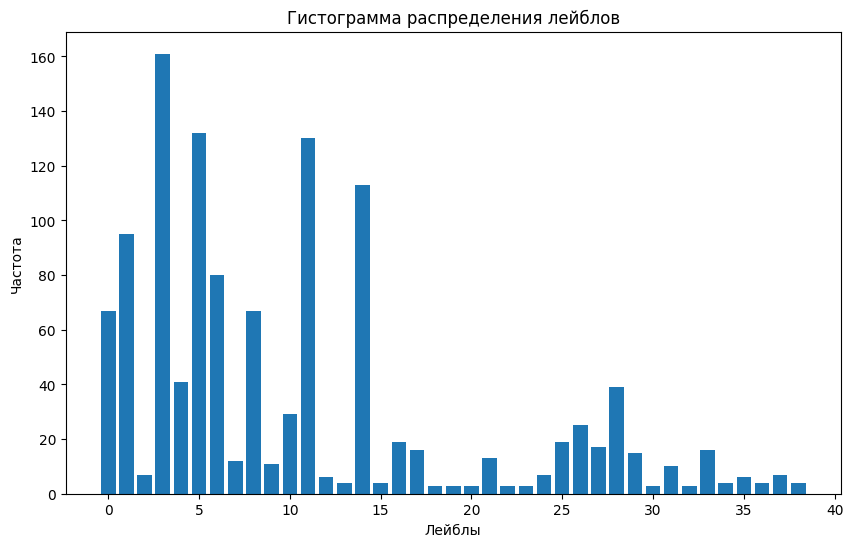

In [7]:
# Распределение классов неравномерное
unique, counts = np.unique(labels, return_counts=True)

plt.figure(figsize=(10, 6))
plt.bar(unique, counts)
plt.title('Гистограмма распределения лейблов')
plt.xlabel('Лейблы')
plt.ylabel('Частота')
plt.show()

## Создадим токены для датасета

In [8]:
from transformers import AutoTokenizer
from transformers import DataCollatorWithPadding

# model_name = 'ai-forever/ruBert-base'
model_name = "DeepPavlov/rubert-base-cased"

tokenizer = AutoTokenizer.from_pretrained(model_name)    
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

tokenizer_config.json:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.65M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [9]:
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=512)

## Определим кастомный датасет

In [12]:
import torch
from torch.utils.data import Dataset

class CustomTextDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

In [13]:
from torch.utils.data import DataLoader

# Создадим датасеты
train_dataset = CustomTextDataset(train_encodings, train_labels)
test_dataset = CustomTextDataset(test_encodings, test_labels)

# Metrics

In [14]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import numpy as np

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    
    # Вычисляем метрики для каждого класса
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average=None)
    
    # Вычисляем средние значения метрик
    macro_f1 = np.mean(f1)
    macro_precision = np.mean(precision)
    macro_recall = np.mean(recall)
    
    # Вычисляем общую точность
    accuracy = accuracy_score(labels, predictions)
    
    # Вычисляем weighted F1-score
    weighted_f1 = precision_recall_fscore_support(labels, predictions, average='weighted')[2]

    return {
        'accuracy': accuracy,
        'macro_f1': macro_f1,
        'macro_precision': macro_precision,
        'macro_recall': macro_recall,
        'weighted_f1': weighted_f1
    }


# Train

In [15]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

model = AutoModelForSequenceClassification.from_pretrained(
    model_name, num_labels=len(label2id), id2label=id2label, label2id=label2id
)

pytorch_model.bin:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at DeepPavlov/rubert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [16]:
training_args = TrainingArguments(
    output_dir=model_name,
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=20,
    weight_decay=0.05,
    eval_strategy="epoch",
    save_strategy="no",
    load_best_model_at_end=False,
    logging_strategy="epoch",
    logging_steps=1,
    metric_for_best_model="weighted_f1"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss,Accuracy,Macro F1,Macro Precision,Macro Recall,Weighted F1
1,3.300300,2.987501,0.232365,0.034369,0.029497,0.058073,0.124486
2,2.861500,2.689354,0.360996,0.089198,0.075396,0.117928,0.253212
3,2.459700,2.404353,0.419087,0.101670,0.092968,0.139227,0.310899
4,2.076800,2.181303,0.468880,0.131502,0.156884,0.163426,0.363951
5,1.769800,1.999471,0.514523,0.178890,0.172178,0.204683,0.428887
6,1.500300,1.844709,0.535270,0.192708,0.179841,0.221210,0.452312
7,1.285300,1.740324,0.576763,0.218019,0.202520,0.248173,0.500308
8,1.114600,1.673265,0.580913,0.242092,0.269006,0.261634,0.523691
9,0.965700,1.603056,0.601660,0.253250,0.303393,0.271745,0.549635
10,0.839400,1.574477,0.601660,0.312540,0.372176,0.313365,0.569932


TrainOutput(global_step=600, training_loss=1.1751651938756307, metrics={'train_runtime': 276.2099, 'train_samples_per_second': 69.512, 'train_steps_per_second': 2.172, 'total_flos': 720505792396800.0, 'train_loss': 1.1751651938756307, 'epoch': 20.0})

In [17]:
eval_results = trainer.evaluate()
eval_results

{'eval_loss': 1.4249272346496582,
 'eval_accuracy': 0.6514522821576764,
 'eval_macro_f1': 0.4101078403393065,
 'eval_macro_precision': 0.4444076281751597,
 'eval_macro_recall': 0.4159494782584028,
 'eval_weighted_f1': 0.630532418693101,
 'eval_runtime': 1.0814,
 'eval_samples_per_second': 222.858,
 'eval_steps_per_second': 7.398,
 'epoch': 20.0}

In [18]:
import torch
import os

def save_model_manually(model, tokenizer, output_dir):
    os.makedirs(output_dir, exist_ok=True)
    
    # Сохраняем состояние модели
    state_dict = model.state_dict()
    for key, param in state_dict.items():
        if isinstance(param, torch.Tensor):
            state_dict[key] = param.detach().cpu().contiguous()
    
    torch.save(state_dict, os.path.join(output_dir, "pytorch_model.bin"))
    
    # Сохраняем конфигурацию модели
    model.config.save_pretrained(output_dir)
    
    # Сохраняем токенизатор
    tokenizer.save_pretrained(output_dir)


In [19]:
save_model_manually(model, tokenizer, model_name)

# Inference модели пример использования

In [20]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(model_name)
inputs = tokenizer('Я хочу чтобы ты купила мне шоколадку', return_tensors="pt")
inputs

{'input_ids': tensor([[  101,   839, 34087,  5247,  4609, 47310, 16740, 51650,  3247,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [21]:
import torch

model.eval()
with torch.no_grad():
    outputs = model(**inputs.to(torch.device('cuda')))

In [22]:
predictions = torch.softmax(outputs.logits, dim=1)
predicted_class = torch.argmax(predictions, dim=1).item()
print(predictions)
id2label[predicted_class]

tensor([[0.0910, 0.0064, 0.0095, 0.0098, 0.0053, 0.5563, 0.0057, 0.0053, 0.0022,
         0.0042, 0.0044, 0.0238, 0.0043, 0.0040, 0.0026, 0.0051, 0.0217, 0.0320,
         0.0080, 0.0073, 0.0113, 0.0070, 0.0059, 0.0073, 0.0124, 0.0039, 0.0151,
         0.0093, 0.0039, 0.0271, 0.0084, 0.0149, 0.0060, 0.0032, 0.0173, 0.0080,
         0.0170, 0.0064, 0.0064]], device='cuda:0')


'ОТСУТСТВУЕТ Отсутствует'

## Accuracy по классам

In [23]:
from torch.utils.data import DataLoader

val_dl = DataLoader(test_dataset, batch_size=16, shuffle=False)
train_dl = DataLoader(train_dataset, batch_size=16, shuffle=False)

In [24]:
def evalute_accuracy_for_split_classes(model, dataloader, labels):
    import torch
    from tqdm import tqdm

    model.eval()  # Переключение модели в режим оценки
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)

    all_outputs = []

    with torch.no_grad():  # Отключение вычисления градиентов
        for batch in tqdm(dataloader, desc="Inference"):
            # Перемещение входных данных на GPU, если доступно
            inputs = {k: v.to(device) for k, v in batch.items() if k != 'labels'}

            # Выполнение предсказания
            outputs = model(**inputs)

            # Сохранение результатов
            all_outputs.append(outputs.logits)

    # Объединение результатов всех батчей
    all_outputs = torch.cat(all_outputs, dim=0)

    first_class_acc = 0
    second_class_acc = 0
    for i, test in enumerate(all_outputs):
        predictions = torch.softmax(test, dim=0)
        predicted_class = torch.argmax(predictions, dim=0).item()
        predicted_class = id2label[predicted_class]
        first_class = label21label[predicted_class]
        second_class = label22label[predicted_class]
        real_first_class = label21label[id2label[labels[i]]]
        real_second_class = label22label[id2label[labels[i]]]
        first_class_acc += first_class == real_first_class
        second_class_acc += second_class == real_second_class

    first_class_acc /= len(labels)
    second_class_acc /= len(labels)
    print(f'first class: {first_class_acc}, second class: {second_class_acc}')

In [25]:
evalute_accuracy_for_split_classes(model, val_dl, test_labels)
evalute_accuracy_for_split_classes(model, train_dl, train_labels)

Inference: 100%|██████████| 16/16 [00:01<00:00, 15.15it/s]


first class: 0.7427385892116183, second class: 0.6514522821576764


Inference: 100%|██████████| 60/60 [00:03<00:00, 17.52it/s]


first class: 0.9760416666666667, second class: 0.9677083333333333
